In [1]:
%reload_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import necessary functions for command line execution
import argparse
import os
from time import strftime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from al_utils import *

# Import relevant functions from MLDE
from Support.RunMlde.RunFuncs import run_mlde_cl, process_args, main_loop

Using TensorFlow backend.


In [2]:
base_1 = pd.read_csv("./Validation/BasicTestData/InputValidationData.csv")
actual_fitness = pickle.load(open("all_fitness.pkl", "rb"))

In [22]:
exp_list0 = [ "random_96_4_20_ucb", "random_96_4_20_lcb","random_96_4_20_ucb_expectation",
             "random_96_4_20_var", "random_96_4_20_random", "384_96_4_20_384", "384b_96_4_20_384b"]
exp_list1 = ["random_96_4_20_wucbR", "random_96_4_20_wlcbR", "random_96_4_20_wucb_expectationR",
             "random_96_4_20_wvarR", "random_96_4_20_random", "384_96_4_20_384", "384b_96_4_20_384b"]
exp_list2 = ["384_96_4_20_wucb", "384_96_4_20_wlcb", "384_96_4_20_wucb_expectation", 
             "384_96_4_20_wvar", "384_96_4_20_random", "384_96_4_20_384", "384b_96_4_20_384b"]
exp_list3 = ["random_96_4_20_w2ucb", "random_96_4_20_w2lcb", "random_96_4_20_w2var"]

label_map = {"random_96_4_20_random":"Random", "random_96_4_20_ucb":"E-UCB",
                 "random_96_4_20_lcb":"E-LCB", "random_96_4_20_var":"FV", 
                 "random_96_4_20_ucb_expectation":"FE", "384_96_4_20_384": "SIM0-1", 
                 "384b_96_4_20_384b": "SIM0-2", "random_96_4_20_wvarR": "TFV", 
                 "random_96_4_20_wucbR":"E-TUCB", "random_96_4_20_wucb_expectationR":"TFE", 
                "random_96_4_20_wlcbR":"E-TLCB", "384_96_4_20_wucb_expectation":"SIM0-1 + TFE", 
                "384_96_4_20_wucb":"SIM0-1 + E-TUCB", "384_96_4_20_wlcb":"SIM0-1 + E-TLCB", 
                 "384_96_4_20_random":"SIM0-1 + Random", "384_96_4_20_wvar":"SIM0-1 + TFV"}

linewidth_list = ["SIM0-2", "SIM0-1", "Random", "SIM0-1 + Random"]

colors = plt.cm.get_cmap('Dark2', 9)
color_map = {key:colors(i) for i,key in enumerate(['dom', 'UCB', 'LCB', 'FV', 'FE', '0-1', '0-2', 'TFV', 'TFE'])}
color_map['TFV'] = color_map['FV']
color_map['TFE'] = color_map['FE']
color_map

{'dom': (0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0),
 'UCB': (0.8509803921568627, 0.37254901960784315, 0.00784313725490196, 1.0),
 'LCB': (0.4588235294117647, 0.4392156862745098, 0.7019607843137254, 1.0),
 'FV': (0.9058823529411765, 0.1607843137254902, 0.5411764705882353, 1.0),
 'FE': (0.4, 0.6509803921568628, 0.11764705882352941, 1.0),
 '0-1': (0.9019607843137255, 0.6705882352941176, 0.00784313725490196, 1.0),
 '0-2': (0.6509803921568628, 0.4627450980392157, 0.11372549019607843, 1.0),
 'TFV': (0.9058823529411765, 0.1607843137254902, 0.5411764705882353, 1.0),
 'TFE': (0.4, 0.6509803921568628, 0.11764705882352941, 1.0)}

TODO
384b_96_4_20_384b  X
384_96_4_20_random X
random_96_4_20_lcb X
random_96_4_20_var X
random_96_4_20_ucb_expectation
random_96_4_20_w1_all



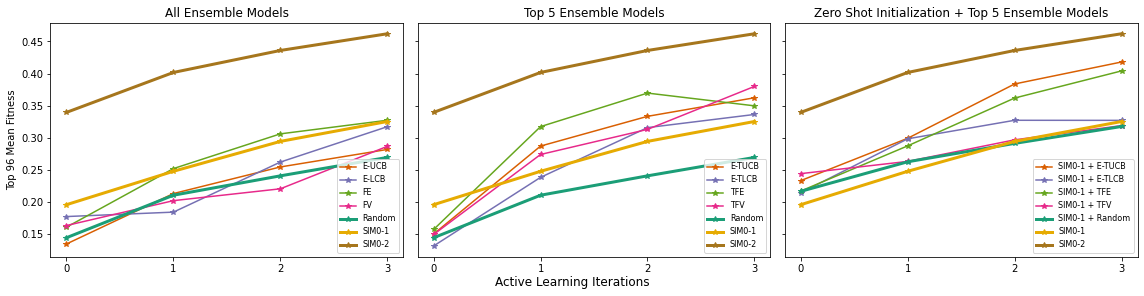

In [129]:
# Show these plots for only one of the lists to show that active learning does not always guarantee positive monotonic gains 
fig, axs = plt.subplots(1,3, figsize = (16,4), sharey = True)

for exp_name in exp_list0:
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    
    axs[0].set_title("All Ensemble Models")
    axs[0].plot(range(all_metrics.shape[1]), [m[2] for m in all_metrics.mean(axis = 0)], marker = "*", linewidth = linewidth, color = color_map[label_map[exp_name][-3:]], label = label_map[exp_name])
    axs[0].set_xticks([0,1,2,3])
axs[0].legend(loc = 4, fontsize = 8)
axs[0].set_ylabel("Top 96 Mean Fitness", fontsize = 10)

for exp_name in exp_list1:
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    axs[1].set_title("Top 5 Ensemble Models")
    axs[1].plot(range(all_metrics.shape[1]), [m[2] for m in all_metrics.mean(axis = 0)], marker = "*", linewidth = linewidth, color = color_map[label_map[exp_name][-3:]], label = label_map[exp_name])
    axs[1].set_xticks([0,1,2,3])
axs[1].legend(loc = 4, fontsize = 8)

for exp_name in exp_list2:
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    axs[2].set_title("Zero Shot Initialization + Top 5 Ensemble Models")
    axs[2].plot(range(all_metrics.shape[1]), [m[2] for m in all_metrics.mean(axis = 0)], marker = "*", linewidth = linewidth, color = color_map[label_map[exp_name][-3:]], label = label_map[exp_name])
    axs[2].set_xticks([0,1,2,3])
fig.text(0.5, -0.005, 'Active Learning Iterations', ha='center', fontsize = 12)
fig.tight_layout()
plt.legend(loc = 4, fontsize = 8)
plt.savefig("mean_fitness.png")

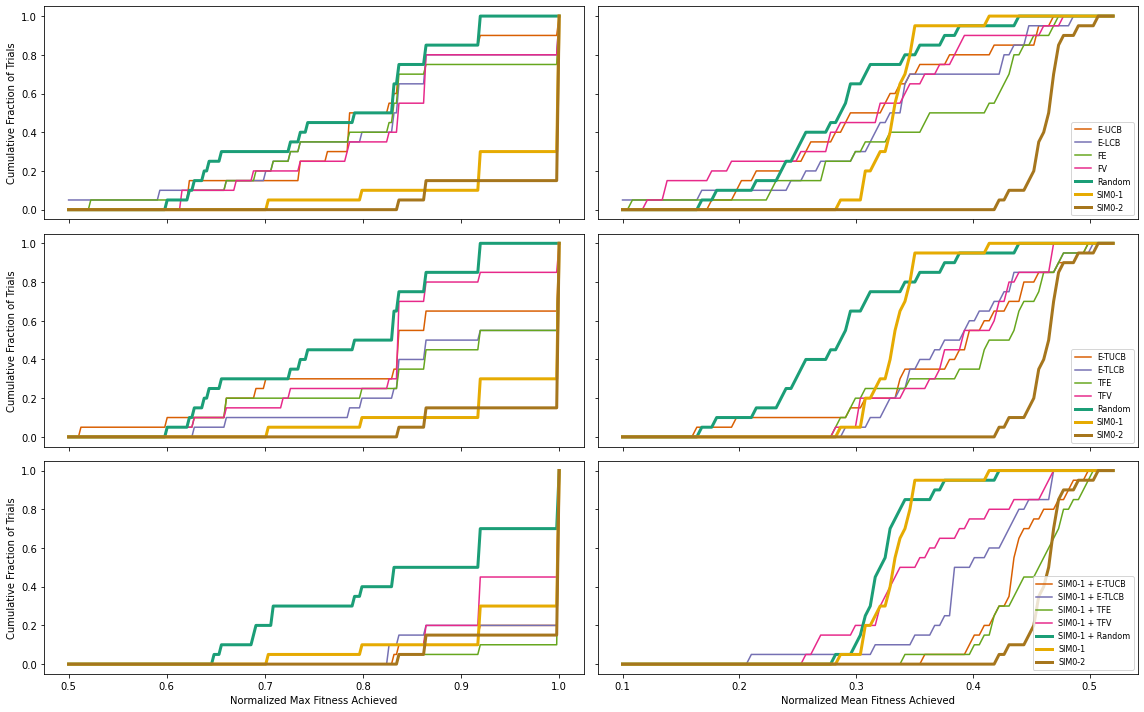

In [23]:
fig, axs = plt.subplots(3,2,figsize = (16,10), sharey = True, sharex = "col")

for exp_name in exp_list0:
    max_vals = []
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,1], -1)
    for i in list(np.linspace(0.5,1,200)):
        max_vals.append(len(max_m[max_m < i])/20)
        
    mean_vals = []
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,2], -1)
    for i in list(np.linspace(0.1,0.52,100)):
        mean_vals.append(len(max_m[max_m < i])/20)

    axs[0,1].plot(list(np.linspace(0.1,0.52,100)), mean_vals, color = color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])

    axs[0,0].plot(list(np.linspace(0.5,1,200)), max_vals, color =color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])
    
for exp_name in exp_list1:
    max_vals = []
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,1], -1)
    for i in list(np.linspace(0.5,1,200)):
        max_vals.append(len(max_m[max_m < i])/20)
        
    mean_vals = []
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,2], -1)
    for i in list(np.linspace(0.1,0.52,100)):
        mean_vals.append(len(max_m[max_m < i])/20)

    axs[1,1].plot(list(np.linspace(0.1,0.52,100)), mean_vals, color = color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])

    axs[1,0].plot(list(np.linspace(0.5,1,200)), max_vals, color = color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])
    
for exp_name in exp_list2:
    max_vals = []
    linewidth = 3 if label_map[exp_name] in linewidth_list else 1.5
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,1], -1)
    for i in list(np.linspace(0.5,1,200)):
        max_vals.append(len(max_m[max_m < i])/20)
        
    mean_vals = []
    all_metrics = np.load("al_results/" + exp_name + "/metrics.npy", allow_pickle = True)
    max_m = np.max(all_metrics[:,:,2], -1)
    for i in list(np.linspace(0.1,0.52,100)):
        mean_vals.append(len(max_m[max_m < i])/20)

    axs[2,1].plot(list(np.linspace(0.1,0.52,100)), mean_vals, color = color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])

    axs[2,0].plot(list(np.linspace(0.5,1,200)), max_vals, color = color_map[label_map[exp_name][-3:]], linewidth = linewidth, label = label_map[exp_name])

axs[0,0].set_ylabel("Cumulative Fraction of Trials")
axs[1,0].set_ylabel("Cumulative Fraction of Trials")
axs[2,0].set_ylabel("Cumulative Fraction of Trials")
axs[2,0].set_xlabel("Normalized Max Fitness Achieved")
axs[2,1].set_xlabel("Normalized Mean Fitness Achieved")

axs[0,1].legend(loc = 4, fontsize = 8)
axs[1,1].legend(loc = 4, fontsize = 8)
axs[2,1].legend(loc = 4, fontsize = 8)
fig.tight_layout()
plt.savefig("ecdf.png")


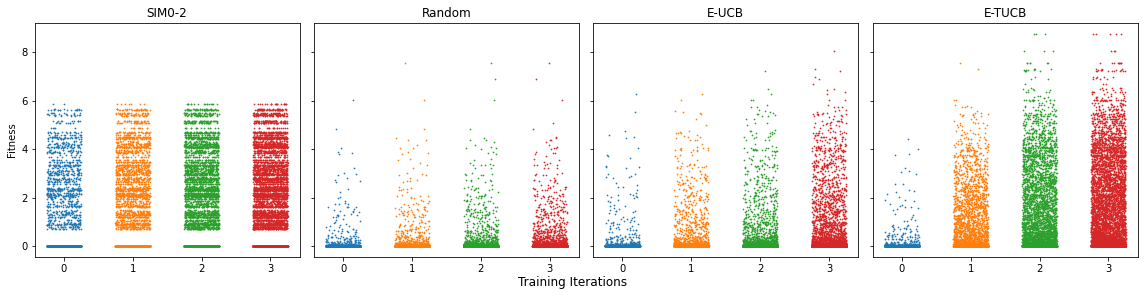

In [133]:
#Do this for the best weighted method, best non-weighted method, random, 384b
#Do this for combined zero shot with active learning experiments 

fig, axs = plt.subplots(1,4, figsize = (16,4), sharey=True, sharex = True)

exp_name = "384b_96_4_20_384b"
axs[0].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[0].scatter(i + random_jitter, data[i], s = 0.5)
axs[0].set_xticks([0,1,2,3])
axs[0].set_ylabel("Fitness")

exp_name = "random_96_4_20_random"
axs[1].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[1].scatter(i + random_jitter, data[i], s = 0.5)
axs[1].set_xticks([0,1,2,3])

exp_name = "random_96_4_20_ucb"
axs[2].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[2].scatter(i + random_jitter, data[i], s = 0.5)
axs[2].set_xticks([0,1,2,3])


exp_name = "random_96_4_20_wucbR"
axs[3].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[3].scatter(i + random_jitter, data[i], s = 0.5)
axs[3].set_xticks([0,1,2,3])
fig.text(0.5, -0.005, 'Training Iterations', ha='center', fontsize = 12)
fig.tight_layout()
plt.savefig("fitness_dist1.png")

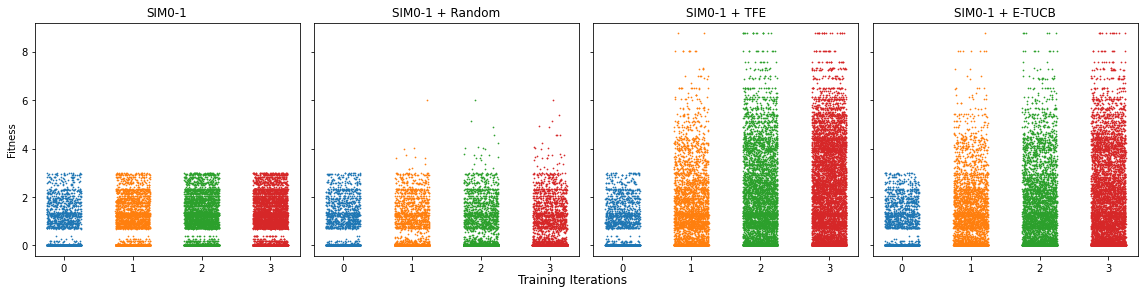

In [134]:
fig, axs = plt.subplots(1,4, figsize = (16,4), sharey=True, sharex = True)

exp_name = "384_96_4_20_384"
axs[0].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[0].scatter(i + random_jitter, data[i], s = 0.5)
axs[0].set_xticks([0,1,2,3])
axs[0].set_ylabel("Fitness")

exp_name = "384_96_4_20_random"
axs[1].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[1].scatter(i + random_jitter, data[i], s = 0.5)
axs[1].set_xticks([0,1,2,3])

exp_name = "384_96_4_20_wucb_expectation"
axs[2].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[2].scatter(i + random_jitter, data[i], s = 0.5)
axs[2].set_xticks([0,1,2,3])

exp_name = "384_96_4_20_wucb"
axs[3].set_title(label_map[exp_name])
train_pools = np.load("al_results/" + exp_name + "/train_pools.npy", allow_pickle = True)
data = np.array( [ fitness_train_pool(train_pools[:,i]) for i in range(4) ] )
for i in range(4):
    random_jitter = np.random.uniform(-0.25,0.25,96 * 20 * (i+1))
    axs[3].scatter(i + random_jitter, data[i], s = 0.5)
axs[3].set_xticks([0,1,2,3])
fig.text(0.5, -0.0, 'Training Iterations', ha='center', fontsize = 12)
fig.tight_layout()
plt.savefig("fitness_dist2.png")

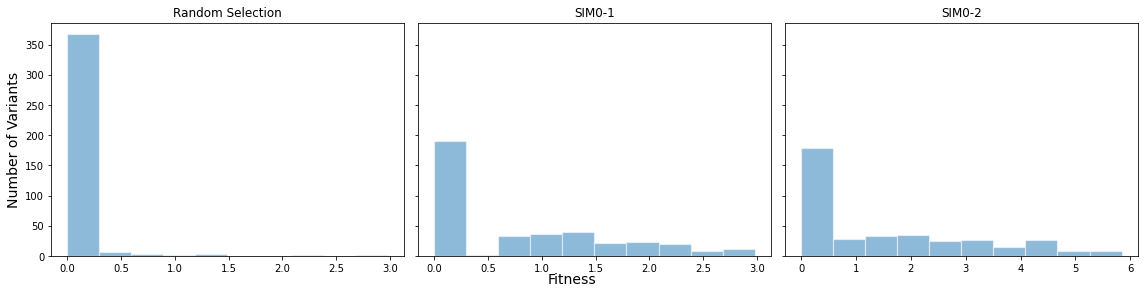

In [110]:
fig, axs = plt.subplots(1,3, figsize = (16,4), sharey = True)

axs[0].set_title("Random Selection")
axs[0].hist(np.random.choice(list(actual_fitness.values()), 384), label = "Random", alpha = 0.5, edgecolor='white', linewidth=1.2)
axs[0].set_ylabel("Number of Variants", fontsize = 14)

axs[1].set_title("SIM0-1")
axs[1].hist(base_1.Fitness, label = "BASE-1", alpha = 0.5, edgecolor='white', linewidth=1.2)

axs[2].set_title("SIM0-2")
axs[2].hist(fitness_variants(list(np.load("base_2.npy"))), label = "BASE-2", alpha = 0.5, edgecolor='white', linewidth=1.2)
fig.text(0.5, -0.0, 'Fitness', ha='center', fontsize = 14)
fig.tight_layout()

plt.savefig("data_dist.png")

In [69]:
#Code block to generate SIM0-2 data 

fitness = []
variants = []
for key in actual_fitness:
    prob = np.random.uniform(0,1)
    if actual_fitness[key] > 0.7 and actual_fitness[key] < 2 and prob < 1/7:
        fitness.append(actual_fitness[key])
        variants.append(key)
    elif actual_fitness[key] > 2 and actual_fitness[key] < 4 and prob < 3/7:
        fitness.append(actual_fitness[key])
        variants.append(key)        
    elif actual_fitness[key] > 4 and actual_fitness[key] < 6:
        fitness.append(actual_fitness[key])
        variants.append(key)  

zero_fitness = []
zero_variants = []
for key in actual_fitness:
    if actual_fitness[key] == 0.0:
        zero_fitness.append(actual_fitness[key])
        zero_variants.append(key)
        
non_zero = list(np.random.choice(variants, 230))
zero = list(np.random.choice(zero_variants, 180))
   
non_zero_samples = np.random.choice(fitness, 214)
zero_samples = np.random.choice(zero_fitness, 170)
# plt.hist(np.concatenate((non_zero_samples,zero_samples)))
# np.save("base_2.npy", list(set(zero + non_zero)))
# print(len(set(zero + non_zero)))
# print(list(set(zero + non_zero)))